In [ ]:
# Part 2: Twitter Sentiment Analysis
# Dataset: Elections.csv


# Import required libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iankw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:

# Business Understanding
# Objective:
# Analyze public sentiment about elections based on tweets.
# Sentiment Question:
#   "What is the overall public sentiment (positive, negative, or neutral)towards the #Elections topic on Twitter?"
print("Goal: Identify how people feel about Elections based on their tweets.")

Goal: Identify how people feel about Elections based on their tweets.


In [ ]:
# Data Understanding 
import pandas as pd

# Load your file
df = pd.read_csv("Elections.csv")

# View structure
print("Original columns:\n", df.columns.tolist())
print("\nDataset shape:", df.shape)
df.head(5) # display first 5 rows of the dataset

Original columns:
 ['css-1jxf684', 'css-175oi2r href', 'css-9pa8cd src', 'css-175oi2r href 2', 'css-1jxf684 2', 'css-1jxf684 3', 'css-146c3p1', 'css-1jxf684 4', 'css-1jxf684 5', 'css-1jxf684 href', 'css-1jxf684 6', 'css-1jxf684 7', 'css-1jxf684 href 2', 'css-1jxf684 8', 'css-1jxf684 href 3', 'css-1jxf684 9', 'css-1jxf684 10', 'css-1jxf684 11', 'css-1jxf684 href 4', 'css-1jxf684 12', 'css-1jxf684 13', 'css-146c3p1 href', 'r-1p0dtai src', 'css-175oi2r href 4', 'css-1jxf684 14', 'css-175oi2r href 5', 'css-9pa8cd src 2', 'css-1jxf684 15', 'css-1jxf684 16', 'css-1jxf684 19', 'css-1jxf684 href 6']

Dataset shape: (310, 31)


,css-1jxf684,css-175oi2r href,css-9pa8cd src,css-175oi2r href 2,css-1jxf684 2,css-1jxf684 3,css-146c3p1,css-1jxf684 4,css-1jxf684 5,css-1jxf684 href,...,css-146c3p1 href,r-1p0dtai src,css-175oi2r href 4,css-1jxf684 14,css-175oi2r href 5,css-9pa8cd src 2,css-1jxf684 15,css-1jxf684 16,css-1jxf684 19,css-1jxf684 href 6
0,People,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maricopa County Elections,https://x.com/MaricopaVote,https://pbs.twimg.com/profile_images/181907667...,https://x.com/MaricopaVote,@MaricopaVote,Follow,Click to Follow MaricopaVote,Maricopa County Elections Department helps,@maricopacounty,https://x.com/maricopacounty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Elections Canada,https://x.com/ElectionsCan_E,https://pbs.twimg.com/profile_images/107573668...,https://x.com/ElectionsCan_E,@ElectionsCan_E,Follow,Click to Follow ElectionsCan_E,Official account of Elections Canada.,@ElectionsCan_F,https://x.com/ElectionsCan_F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elections NL,https://x.com/NLElections,https://pbs.twimg.com/profile_images/112610239...,https://x.com/NLElections,@NLElections,Follow,Click to Follow NLElections,Official Twitter account of Elections Newfound...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,View all,https://x.com/search?q=%23Elections&src=typed_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Rename columns for clarity

# We'll treat the first text-heavy column as the tweet text
# Adjust if another column has more meaningful content
df.rename(columns={
    'css-1jxf684': 'tweet_text'
}, inplace=True)

# Keep only text column (and drop completely empty ones)
df = df[['tweet_text']].dropna()

print("Columns after renaming:", df.columns.tolist())
df.head(5)

Columns after renaming: ['tweet_text']


,tweet_text
0,People
1,Maricopa County Elections
2,Elections Canada
3,Elections NL
4,View all


In [6]:
df.columns = ["tweet_text"]

In [ ]:
# Data Preparation

# Define a function to clean tweets
def clean_tweet(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)         # remove URLs
    text = re.sub(r"@\w+", "", text)            # remove mentions
    text = re.sub(r"#\w+", "", text)            # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)         # remove punctuation
    text = re.sub(r"\d+", "", text)             # remove numbers
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

df["clean_text"] = df["tweet_text"].apply(clean_tweet)

# Lemmatize the cleaned text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df["lemmatized_text"] = df["clean_text"].apply(lemmatize_text)

# Display sample
df[["tweet_text", "lemmatized_text"]].head(10)


,tweet_text,lemmatized_text
0,People,people
1,Maricopa County Elections,maricopa county election
2,Elections Canada,election canada
3,Elections NL,election nl
4,View all,view
5,Big Timber Lodge,big timber lodge
6,Akashdeep Thind,akashdeep thind
7,TVShowJunkie,tvshowjunkie
8,Phillip Scott,phillip scott
9,Indian,indian


In [ ]:
# Feature Engineering (TF-IDF)

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["lemmatized_text"])

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (310, 337)


In [ ]:
# Modeling (VADER Sentiment Scoring)

sid = SentimentIntensityAnalyzer()

df["compound"] = df["lemmatized_text"].apply(lambda x: sid.polarity_scores(x)["compound"])
df["sentiment"] = df["compound"].apply(
    lambda c: "positive" if c > 0.05 else ("negative" if c < -0.05 else "neutral")
)

df[["lemmatized_text", "compound", "sentiment"]].head(10)


,lemmatized_text,compound,sentiment
0,people,0.0,neutral
1,maricopa county election,0.0,neutral
2,election canada,0.0,neutral
3,election nl,0.0,neutral
4,view,0.0,neutral
5,big timber lodge,0.0,neutral
6,akashdeep thind,0.0,neutral
7,tvshowjunkie,0.0,neutral
8,phillip scott,0.0,neutral
9,indian,0.0,neutral


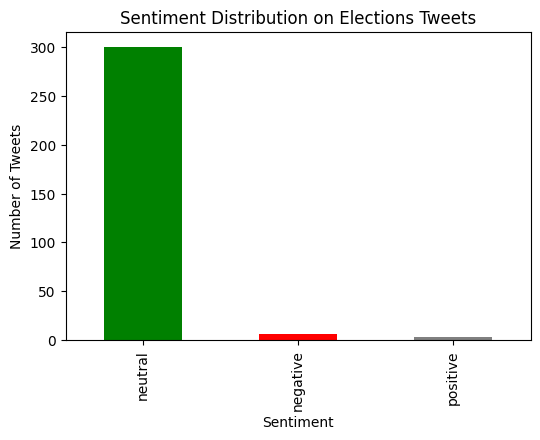

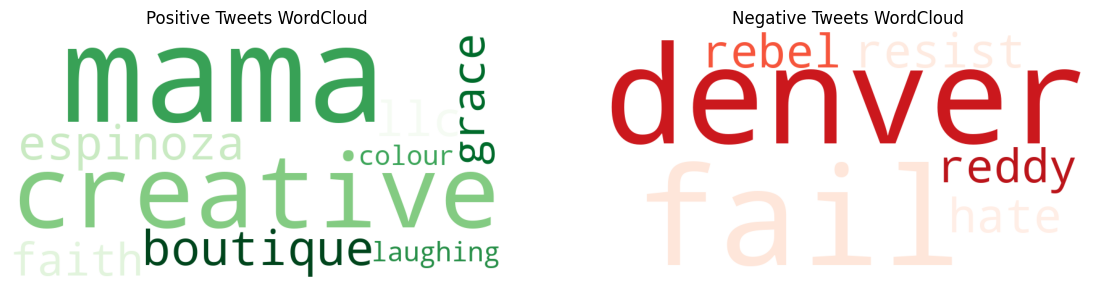

In [ ]:
# Evaluation: Sentiment Distribution

sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution on Elections Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

# WordClouds for Positive & Negative Tweets
positive_text = " ".join(df[df["sentiment"] == "positive"]["lemmatized_text"])
negative_text = " ".join(df[df["sentiment"] == "negative"]["lemmatized_text"])

wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.axis("off")
plt.title("Positive Tweets WordCloud")

plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.axis("off")
plt.title("Negative Tweets WordCloud")

plt.show()


In [ ]:
# Interpretation
print("Summary of Findings:\n")

# Overall sentiment
overall = df["sentiment"].value_counts(normalize=True) * 100
print("Overall Sentiment Distribution (%):")
print(overall.round(2), "\n")

# Top words driving positive vs negative tweets
from collections import Counter

positive_words = " ".join(df[df["sentiment"] == "positive"]["lemmatized_text"]).split()
negative_words = " ".join(df[df["sentiment"] == "negative"]["lemmatized_text"]).split()

print("Top words in positive tweets:")
print(Counter(positive_words).most_common(10), "\n")

print("Top words in negative tweets:")
print(Counter(negative_words).most_common(10))


Summary of Findings:

Overall Sentiment Distribution (%):
sentiment
neutral     97.10
negative     1.94
positive     0.97
Name: proportion, dtype: float64 

Top words in positive tweets:
[('mama', 1), ('creative', 1), ('boutique', 1), ('llc', 1), ('espinoza', 1), ('faith', 1), ('grace', 1), ('laughing', 1), ('colour', 1)] 

Top words in negative tweets:
[('denver', 4), ('fail', 4), ('resist', 1), ('hate', 1), ('rebel', 1), ('reddy', 1)]


In [12]:
# Save processed dataset
df.to_csv("Elections_Analyzed.csv", index=False)
print("✅ Analysis complete and saved as 'Elections_Analyzed.csv'")


✅ Analysis complete and saved as 'Elections_Analyzed.csv'


In [1]:
import pandas as pd

df = pd.read_csv("Elections.csv")
print(df.columns)
df.head(5)


Index(['css-1jxf684', 'css-175oi2r href', 'css-9pa8cd src',
       'css-175oi2r href 2', 'css-1jxf684 2', 'css-1jxf684 3', 'css-146c3p1',
       'css-1jxf684 4', 'css-1jxf684 5', 'css-1jxf684 href', 'css-1jxf684 6',
       'css-1jxf684 7', 'css-1jxf684 href 2', 'css-1jxf684 8',
       'css-1jxf684 href 3', 'css-1jxf684 9', 'css-1jxf684 10',
       'css-1jxf684 11', 'css-1jxf684 href 4', 'css-1jxf684 12',
       'css-1jxf684 13', 'css-146c3p1 href', 'r-1p0dtai src',
       'css-175oi2r href 4', 'css-1jxf684 14', 'css-175oi2r href 5',
       'css-9pa8cd src 2', 'css-1jxf684 15', 'css-1jxf684 16',
       'css-1jxf684 19', 'css-1jxf684 href 6'],
      dtype='object')


,css-1jxf684,css-175oi2r href,css-9pa8cd src,css-175oi2r href 2,css-1jxf684 2,css-1jxf684 3,css-146c3p1,css-1jxf684 4,css-1jxf684 5,css-1jxf684 href,...,css-146c3p1 href,r-1p0dtai src,css-175oi2r href 4,css-1jxf684 14,css-175oi2r href 5,css-9pa8cd src 2,css-1jxf684 15,css-1jxf684 16,css-1jxf684 19,css-1jxf684 href 6
0,People,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maricopa County Elections,https://x.com/MaricopaVote,https://pbs.twimg.com/profile_images/181907667...,https://x.com/MaricopaVote,@MaricopaVote,Follow,Click to Follow MaricopaVote,Maricopa County Elections Department helps,@maricopacounty,https://x.com/maricopacounty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Elections Canada,https://x.com/ElectionsCan_E,https://pbs.twimg.com/profile_images/107573668...,https://x.com/ElectionsCan_E,@ElectionsCan_E,Follow,Click to Follow ElectionsCan_E,Official account of Elections Canada.,@ElectionsCan_F,https://x.com/ElectionsCan_F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elections NL,https://x.com/NLElections,https://pbs.twimg.com/profile_images/112610239...,https://x.com/NLElections,@NLElections,Follow,Click to Follow NLElections,Official Twitter account of Elections Newfound...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,View all,https://x.com/search?q=%23Elections&src=typed_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
